In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data1.csv")

In [3]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.292206   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.695030   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.887000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.209000   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD822ED580>,
      dtype=object)

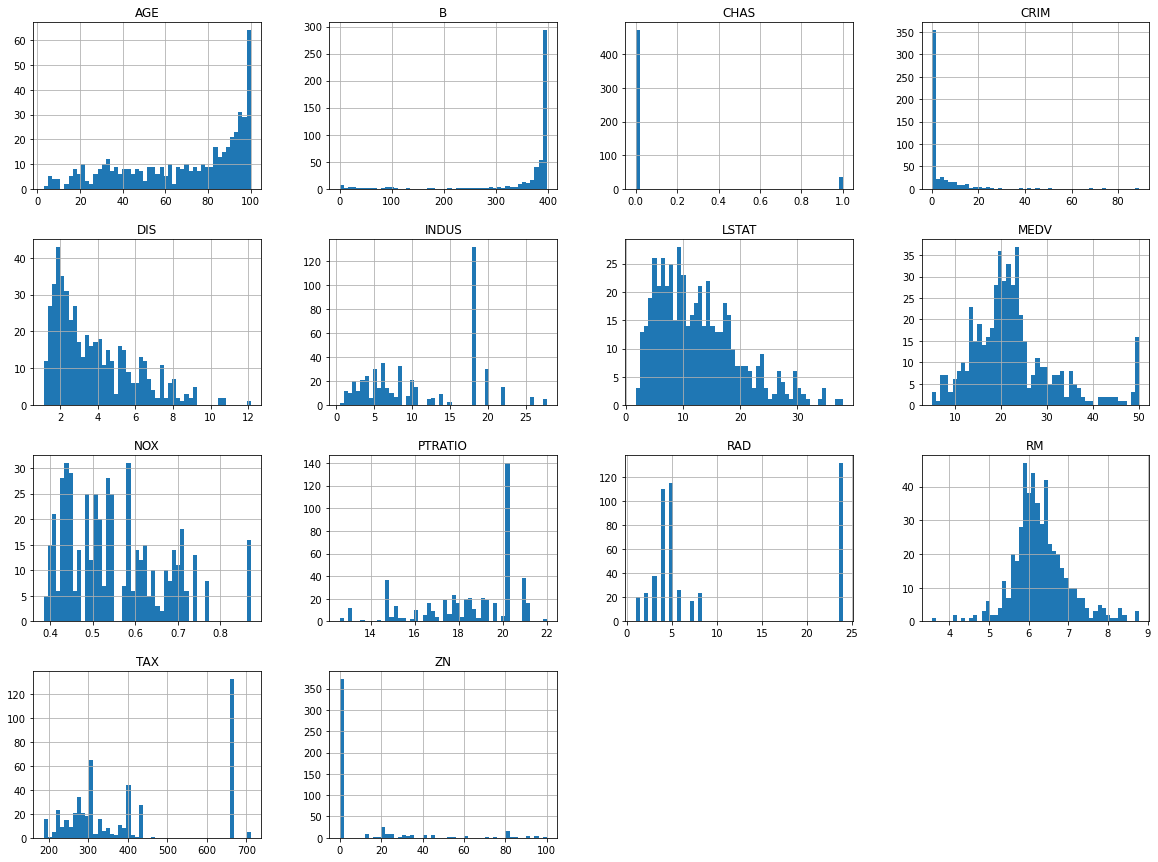

In [9]:
housing.hist(bins = 50, figsize = (20, 15))

In [10]:
import numpy as np
# Splitting the data into training and testing data
def split_train_test(data, test_ratio):
    np.random.seed(123)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
# train_set, test_set = split_train_test(housing, 0.25)

In [12]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.25, random_state = 123)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 379
Rows in test set: 127



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 123)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set['CHAS'].value_counts()

0    118
1      9
Name: CHAS, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

0    353
1     26
Name: CHAS, dtype: int64

In [17]:
housing = strat_train_set.copy()

In [18]:
# Looking for corelations
cor_matrix = housing.corr()
cor_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.677962
ZN         0.370933
B          0.335187
DIS        0.204901
CHAS       0.161379
RAD       -0.348252
AGE       -0.350429
CRIM      -0.367945
NOX       -0.400961
TAX       -0.435637
INDUS     -0.452377
PTRATIO   -0.478484
LSTAT     -0.717509
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD85A03820>,
      dtype=object)

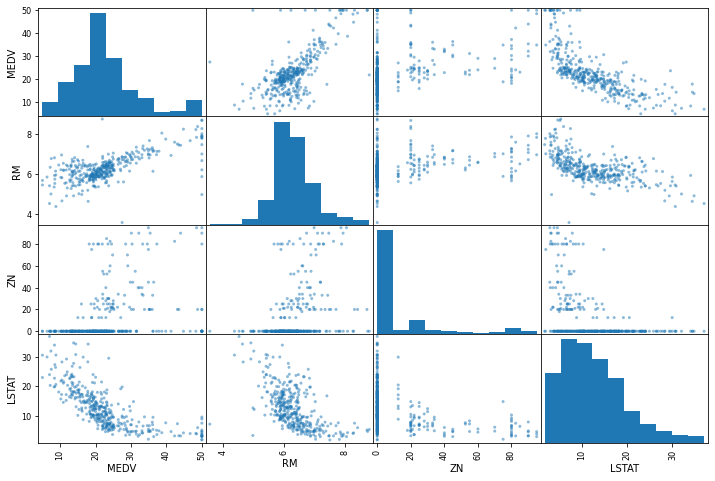

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize = (12, 8))

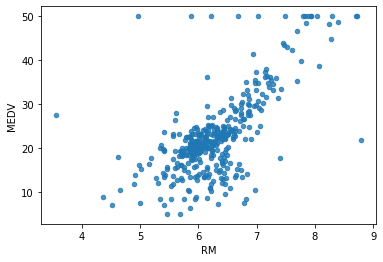

In [20]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV", alpha = 0.8)

In [21]:
# Trying out attribute combinations

In [22]:
housing['TAXRM'] = housing['TAX'] / housing['RM']

In [23]:
housing.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
438  13.67810   0.0  18.10     0  0.740  5.935  87.9  1.8206   24  666   
194   0.01439  60.0   2.93     0  0.401  6.604  18.8  6.2196    1  265   
224   0.31533   0.0   6.20     0  0.504  8.266  78.3  2.8944    8  307   
356   8.98296   0.0  18.10     1  0.770  6.212  97.4  2.1222   24  666   
29    1.00245   0.0   8.14     0  0.538    NaN  87.3  4.2390    4  307   

     PTRATIO       B  LSTAT  MEDV       TAXRM  
438     20.2   68.95  34.02   8.4  112.215670  
194     15.6  376.70   4.38  29.1   40.127196  
224     17.4  385.05   4.14  44.8   37.140092  
356     20.2  377.73  17.60  17.8  107.211848  
29      21.0  380.23  11.98  21.0         NaN

In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.677962
ZN         0.370933
B          0.335187
DIS        0.204901
CHAS       0.161379
RAD       -0.348252
AGE       -0.350429
CRIM      -0.367945
NOX       -0.400961
TAX       -0.435637
INDUS     -0.452377
PTRATIO   -0.478484
TAXRM     -0.511008
LSTAT     -0.717509
Name: MEDV, dtype: float64

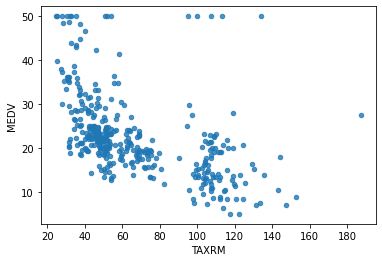

In [25]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV", alpha = 0.8)

In [26]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

In [27]:
# Missing attributes
## To take care of missing attributes, we have three options:
    # Get rid of the missing data points
    # Get rid of the whole attribute
    # Set the values to some value(0,mean or median)

In [28]:
a = housing.dropna(subset = ["RM"]) # Option 1
a.shape

(374, 13)

In [29]:
housing.drop("RM", axis = 1).shape
# Note that there is no RM column

(379, 12)

In [30]:
median = housing["RM"].median()
print(median)

6.214


In [31]:
housing["RM"].fillna(median)

438    5.935
194    6.604
224    8.266
356    6.212
29     6.214
       ...  
437    6.152
146    5.628
398    5.453
372    5.875
371    6.216
Name: RM, Length: 379, dtype: float64

In [32]:
housing.shape

(379, 13)

In [33]:
housing.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  374.000000   
mean     3.779410   11.445910   11.199288    0.068602    0.556633    6.296628   
std      9.384129   23.610073    6.846308    0.253110    0.115355    0.683343   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.083390    0.000000    5.130000    0.000000    0.459000    5.888250   
50%      0.268380    0.000000    9.690000    0.000000    0.538000    6.214000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    68.663061    3.767256    9.546174  407.781003   18.407652  354.724617   
std     27.916508    2.064522    8.653216  168.163712    2.224448   95.563646   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     44.050000    2.115300    4.000000  280.500000   16.900000  376.355000   
50%     77.700000    3.112100    5.000000  330.000000   19.000000  391.270000   
75%     93.850000    5.118000   24.000000  666.000000   20.200000  395.850000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  379.000000  
mean    12.496596  
std      6.968785  
min      1.730000  
25%      6.925000  
50%     11.280000  
75%     16.620000  
max     36.980000

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_.shape

(13,)

In [36]:
X = imputer.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [38]:
housing_tr.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean     3.779410   11.445910   11.199288    0.068602    0.556633    6.295538   
std      9.384129   23.610073    6.846308    0.253110    0.115355    0.678874   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.083390    0.000000    5.130000    0.000000    0.459000    5.892000   
50%      0.268380    0.000000    9.690000    0.000000    0.538000    6.214000   
75%      3.621175   12.500000   18.100000    0.000000    0.624000    6.612500   
max     88.976200   95.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    68.663061    3.767256    9.546174  407.781003   18.407652  354.724617   
std     27.916508    2.064522    8.653216  168.163712    2.224448   95.563646   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     44.050000    2.115300    4.000000  280.500000   16.900000  376.355000   
50%     77.700000    3.112100    5.000000  330.000000   19.000000  391.270000   
75%     93.850000    5.118000   24.000000  666.000000   20.200000  395.850000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  379.000000  
mean    12.496596  
std      6.968785  
min      1.730000  
25%      6.925000  
50%     11.280000  
75%     16.620000  
max     36.980000

# Scikit-Learn Design

3 types of objects
1. Estimators - It estimates some parameter based on a dataset. It has a fit method and transform method. Fit method - Fits in                 the dataset and calculates the parameters
                
2. Transformers - Takes input and returns output based on the learning from the fit model. It also has a convenience function called fit_transform() which fits and then transforms.
                  
3. Predictors - LinearRegression model is an example of predictor. Fit() and predict() are two common                                           functions. It also gives score() function which will evaluate the predictions.

Feature Scaling
Two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler.
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class class Standard Scaler for this
    

# # Creating a pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('std_scalar', StandardScaler())
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [41]:
housing_num_tr.shape

(379, 13)

In [42]:
# Selecting a desired model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]

In [44]:
some_labels = housing_labels.iloc[:5]

In [45]:
prepared_data = my_pipeline.transform(some_data)

In [46]:
model.predict(prepared_data)
  

array([ 8.734, 28.327, 46.276, 16.545, 20.442])

In [47]:
list(some_labels)

[8.4, 29.1, 44.8, 17.8, 21.0]

In [48]:
# Evaluating the model
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
mse

1.701608245382588

In [50]:
rmse

1.3044570691987483

In [51]:
## Using Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([3.31771005, 3.91477691, 2.43366574, 3.33534269, 2.81986796,
       3.03670029, 2.79101583, 3.63955436, 4.58296943, 6.52303886])

In [53]:
def print_scores(scores):
    print("Scores :", scores)
    print("Mean :", scores.mean())
    print("Standard Deviation :", scores.std())

In [54]:
print_scores(rmse_scores)

Scores : [3.31771005 3.91477691 2.43366574 3.33534269 2.81986796 3.03670029
 2.79101583 3.63955436 4.58296943 6.52303886]
Mean : 3.6394642119011826
Standard Deviation : 1.1263167650977597


In [55]:
# Saving the model

In [56]:
from joblib import dump, load
dump(model, 'PricePred.joblib')

['PricePred.joblib']

In [57]:
# Testing the model on test data

In [58]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions, list(y_test))

[20.828 20.916 22.586 18.535 24.609 15.793 24.706 26.245 24.087 24.227
 33.27  23.744 30.409 21.04  24.292 30.188  8.752 31.408 13.085 34.932
 35.146 27.354 19.74  32.187 35.537 20.217 15.434 11.333  8.691 19.391
 21.816 20.802 10.793 21.433 28.001  9.594 28.337 14.018 27.167 12.023
  9.008 16.554 10.078 33.947 12.006 33.874 22.55  19.788 14.756 15.216
 19.917 18.416 47.89  48.998 18.789 28.5   19.925 10.269 24.543 20.75
 17.632 20.133 15.15  49.502 27.723 10.339 23.848 16.468 24.551 14.661
  8.407 14.254 20.566 22.682 31.842 16.347 17.691 23.843 17.497 20.997
 25.496 22.13  21.804 20.002 20.028 25.839 21.521 19.89  20.924 16.132
 21.833 13.704 10.427 45.172 20.194 28.176 18.901 25.15  26.    34.186
 20.979 18.835 21.914 18.706 14.925 16.678  9.589 29.173 44.3   34.253
 15.264 13.03  22.891 22.295 19.656 39.43  23.163 22.634 47.913 14.128
 18.102 19.09  20.92  25.997 15.423 23.432 30.202] [21.2, 19.5, 21.4, 17.5, 24.7, 16.7, 22.8, 28.6, 24.4, 24.8, 31.7, 24.2, 15.0, 20.6, 22.5, 23.7, 5

In [59]:
final_rmse

2.7887216245463815

In [60]:
prepared_data[0]

array([ 1.05622737, -0.48543011,  1.00927895, -0.27139342,  1.59169   ,
       -0.53178488,  0.68999919, -0.94415533,  1.67254943,  1.53755129,
        0.8068148 , -2.99436436,  3.09262717])

In [61]:
# Using the model

In [62]:
from joblib import dump, load
import numpy as np
model = load('PricePred.joblib')
features = np.array([[1.05622737, -0.48543011,  1.00927895, -0.27139342,  1.59169   ,
       -0.53178488,  0.89999919, -0.94415533,  1.67254943,  1.53755129,
        0.8068148 , -2.99436436,  3.09262717]])
model.predict(features)

array([9.119])